# Plotting Lines with Matplotlib

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Create the data


In [5]:
# Simple sinus cosinus plots with 256 points
X = np.linspace(-np.pi, np.pi, 256,endpoint=True)
C,S = np.cos(X), np.sin(X)

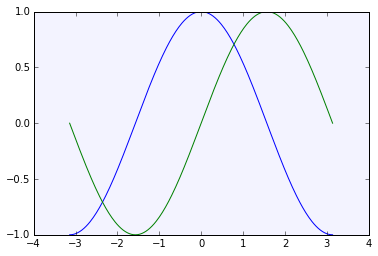

In [7]:
# Can't be simpler than that
plt.plot(X,C)
plt.plot(X,S)


# Fig, ax and subplots

More control when you specify the figure

* **fig** is for global figure operations such as saving the figure to a file: **fig.savefig('yourfilename.png')** or setting dimensions
* **ax** is for subplots level operations: 


> fig = plt.figure()

> ax = fig.add_subplot(111)

which is equivalent to 

> fig, ax = plt.subplots()

Here we only have one (sub)plot

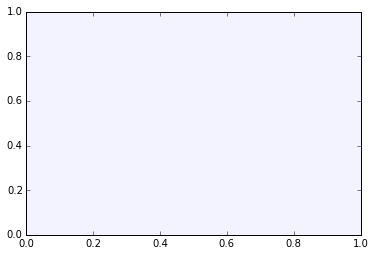

In [8]:
# Which gives
fig, ax = plt.subplots()


In [9]:
# Fig is all about dimensions
print(fig)

Figure(480x320)


In [10]:
# ax has some coordinates related info
print(ax)

Axes(0.125,0.125;0.775x0.775)


# Double plot and titles

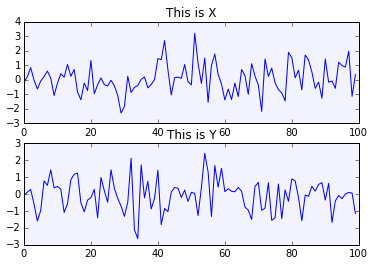

In [21]:
# Some data

np.random.seed(888)
x,y = np.random.randn(2, 100)


# Create the figure
fig = plt.figure()

# Work on the first subplot
ax1 = fig.add_subplot(211)
ax1.plot(x)

# Work on the second subplot
ax2 = fig.add_subplot(212)
ax2.plot(y)

# set titles for each subplots
ax1.set_title('This is X')
ax2.set_title('This is Y')



### to *ax* or not to *ax*?

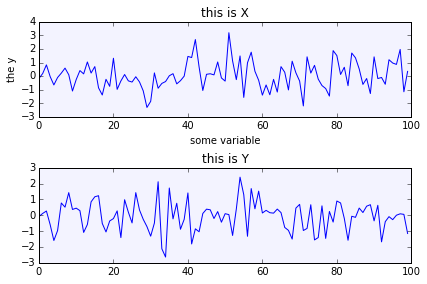

In [34]:
# If we don't specify the ax

fig = plt.figure()
plt.subplot(211)
plt.plot(x)

# All operations are on the first  plot
plt.title('this is X')

# switch to second plot 
plt.subplot(212)
plt.plot(y)
plt.title('this is Y')

# you have to explicitly re select the first plot if you want to work on it
plt.subplot(211)
plt.xlabel('some variable')
plt.ylabel('the y')

# The magic command for space between plots
plt.tight_layout(pad=1.0)

<class 'numpy.ndarray'>
Axes(0.125,0.547727;0.775x0.352273)
Axes(0.125,0.125;0.775x0.352273)


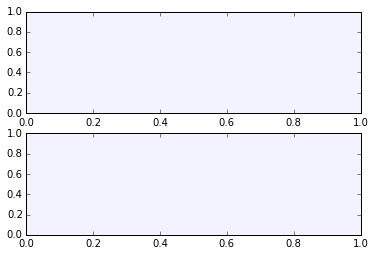

In [38]:
# A more concise way

fig, ax = plt.subplots(2,1)

# ax is now an array
print(type(ax))
print(ax[0])
print(ax[1])



### Playing with *ax*'s coordinates

Bbox('array([[ 0.125     ,  0.54772727],\n       [ 0.9       ,  0.9       ]])')


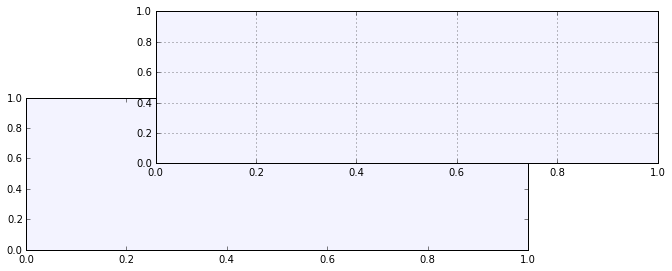

In [61]:
# Let's move the subplot

# New figure
fig = plt.figure(figsize=(9,6))
# First subplot
ax1 = fig.add_subplot(211)

# get the position of 1st subplot
pos1 = ax1.get_position() 
print(pos1)

# New coordinates: simple translatation
pos2 = [pos1.x0 + 0.2, pos1.y0 + 0.2,  pos1.width , pos1.height] 

# New coordinates: translatation and contraction
# pos2 = [pos1.x0 - 0.05 , pos1.y0 + 0.15 ,  pos1.width / 3 , pos1.height /2] 


# 2nd subplot
ax2 = fig.add_subplot(221)

# set 2nd subplot position
ax2.set_position(pos2) 
ax2.grid()


# Back to our sinusoids

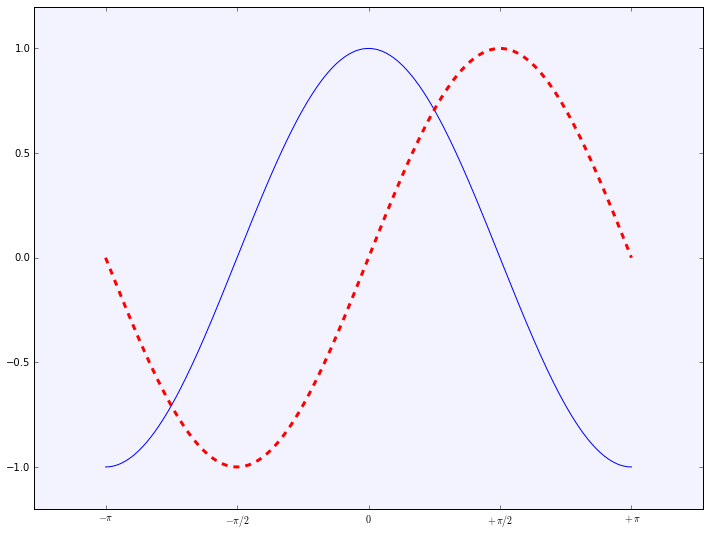

In [67]:
fig, ax = plt.subplots(figsize=(12, 9))

# Line style

plt.plot(X,C,  color="blue", linewidth=1.0, linestyle="-")
plt.plot(X,S,  color="red" , linewidth=3.0, linestyle='dashed')

# bit tight, set vertical axis limits
plt.ylim(-1.2, 1.2)

# Too many x ticks 
plt.xticks( [-np.pi, -np.pi/2, 0, np.pi/2, np.pi])

# Let's talk trigonometry: Ticks with positions and labels (Latex)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$']);


# Spines

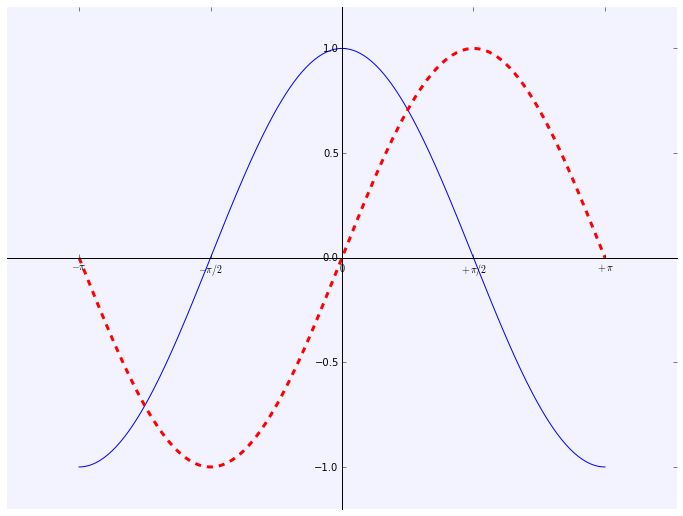

In [69]:
fig, ax = plt.subplots(figsize=(12, 9))

# Previously
plt.plot(X,C,  color="blue", linewidth=1.0, linestyle="-")
plt.plot(X,S,  color="red" , linewidth=3.0, linestyle='dashed')
plt.ylim(-1.2, 1.2)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$']);

# Right spine disappears 
ax.spines['right'].set_color('none')
# Top spine also disappears 
ax.spines['top'].set_color('none')

# Move bottom spine to middle
ax.spines['bottom'].set_position(('data',0))
# and left spine to center
ax.spines['left'].set_position(('data',0))

# Legend, font size, and annotations


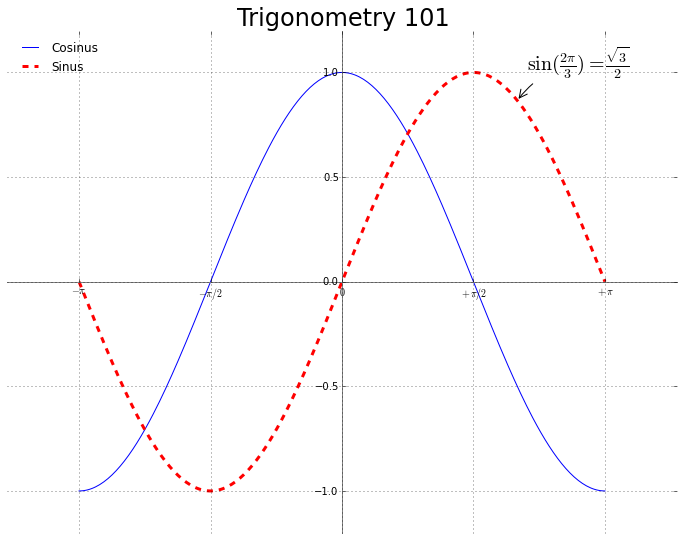

In [70]:
fig, ax = plt.subplots(figsize=(12, 9))

plt.plot(X,C,  color="blue", linewidth=1.0, linestyle="-", label = 'Cosinus')
plt.plot(X,S,  color="red" , linewidth=3.0, linestyle='dashed', label = 'Sinus')

# ticks
plt.ylim(-1.2, 1.2)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$']);

# make the label bigger, with a slight white background
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(16)
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.5 ))
    
# Center spines
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))

# Make them grey
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray')

# And let the plot choose the best position or Upper Left 
# frameon removes the border
plt.legend(loc='upper left', frameon=False)

# Background color
ax.set_axis_bgcolor('white')

# Keep a grid
plt.grid()

# And annotations
t = 2*np.pi/3
plt.annotate(r'$\sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
             xy=(t, np.sin(t)), 
             xycoords='data',
             xytext=(+10, +30), 
             textcoords='offset points', 
             fontsize=20,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2")
            )

# Title
plt.title('Trigonometry 101', fontsize=24)

# And save
fig.savefig('lesson_6_Trigonometry_101.png')


# Ref
This notebook is inspired from this tutorial http://www.labri.fr/perso/nrougier/teaching/matplotlib/matplotlib.html

So what makes a nice plot?
